## Page View Time Series Visualizer

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, matplotlib, and seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv',  parse_dates = ["date"])
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1304 non-null   datetime64[ns]
 1   value   1304 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 20.5 KB


In [4]:
#Clean Data

df = (df[(df['value']>= df['value'].quantile(0.025)) & (df['value']<=df['value'].quantile(0.975))]).reset_index(drop=True)

df.head()

,date,value
0,2016-05-19,19736
1,2016-05-26,18060
2,2016-05-27,19997
3,2016-05-28,19044
4,2016-05-29,20325


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1238 non-null   datetime64[ns]
 1   value   1238 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 19.5 KB


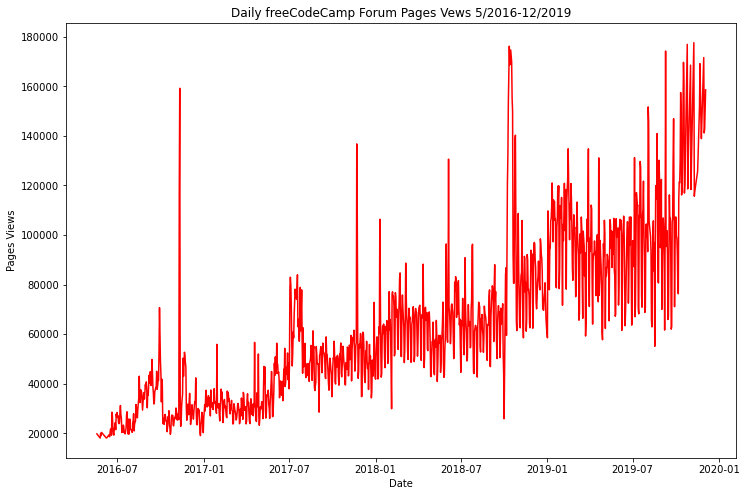

In [6]:
# Draw line plot


fig = plt.figure(figsize=(12,8))

plt.plot(df['date'], df['value'], color='red')

plt.ylabel('Pages Views')
plt.xlabel('Date')
plt.title('Daily freeCodeCamp Forum Pages Vews 5/2016-12/2019')



plt.show()

In [7]:
#Bar Plot

df_bar = df.copy()
df_bar['year'] = [d.year for d in df_bar.date]

df_bar['month'] = [d.strftime('%B') for d in df_bar.date]

df_bar.head()

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May


In [8]:
df_bar = pd.DataFrame(df_bar.groupby(["year", "month"])['value'].mean()).reset_index()
df_bar.head()

,year,month,value
0,2016,August,31049.193548
1,2016,December,27832.419355
2,2016,July,24109.678571
3,2016,June,21875.105263
4,2016,May,19432.400000


In [9]:

df_bar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    44 non-null     int64  
 1   month   44 non-null     object 
 2   value   44 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


Text(0.5, 0, 'Years')

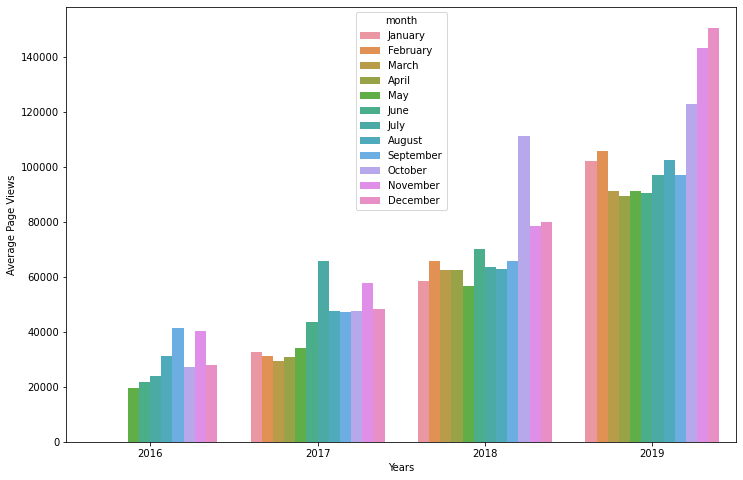

In [10]:
fig = plt.figure(figsize=(12,8))

Months = ["January", "February", "March",  "April", "May", "June", "July", "August", "September", "October", "November", "December"]



sns.barplot(data=df_bar, x="year", y="value", hue="month",hue_order= Months, ci=None)

plt.ylabel('Average Page Views')
plt.xlabel('Years')

In [11]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box.head()

,index,date,value,year,month
0,0,2016-05-19,19736,2016,May
1,1,2016-05-26,18060,2016,May
2,2,2016-05-27,19997,2016,May
3,3,2016-05-28,19044,2016,May
4,4,2016-05-29,20325,2016,May


[Text(0.5, 0, 'month'), Text(0, 0.5, 'Page Views')]

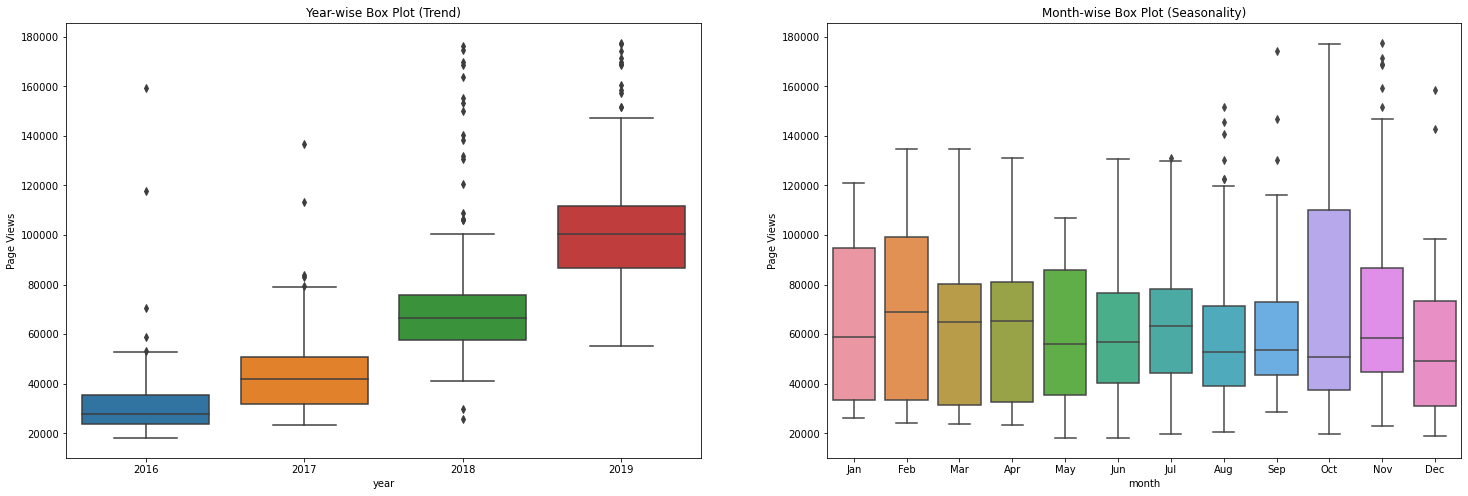

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(25, 8), sharey=False)
#fig.suptitle('Initial Pokemon - 1st Generation')

Months_abb = ["Jan", "Feb", "Mar",  "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
# Year
sns.boxplot(ax=axes[0], x='year', y='value',data=df_box )
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set(xlabel='year', ylabel='Page Views')

# Month
sns.boxplot(ax=axes[1], x='month', y='value',data=df_box, order= Months_abb)
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set(xlabel='month', ylabel='Page Views')
